In [4]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

train_transform = transforms.Compose([
    transforms.Grayscale(),        # if images are grayscale
    transforms.Resize((48, 48)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.Resize((48, 48)),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder("../data/train", transform=train_transform)
test_dataset = datasets.ImageFolder("../data/test", transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print(train_dataset.classes)  # ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [5]:
import torch
import torchvision
print(torch.__version__)
print(torchvision.__version__)


2.9.1+cpu
0.24.1+cpu


# Dataset Exploration - Facial Emotion Recognition

Goal: Explore the FER-style dataset to understand structure, visualize samples, and identify any issues before training.

Tasks:
- Load dataset using ImageFolder
- Inspect classes & sample counts
- Visualize sample images
- Confirm grayscale & image shapes
- Detect class imbalance or data issues


In [6]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


In [7]:
# Change these paths based on your folder structure
train_dir = "../data/train"
test_dir = "../data/test"

BATCH_SIZE = 32
IMG_SIZE = (48, 48)  # Typical FER-2013 resolution


In [8]:
basic_transform = transforms.Compose([
    transforms.Grayscale(),  # ensure single channel
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor()
])

train_dataset = datasets.ImageFolder(train_dir, transform=basic_transform)
test_dataset = datasets.ImageFolder(test_dir, transform=basic_transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

classes = train_dataset.classes
classes


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [9]:
print("Number of classes:", len(classes))
for emotion in classes:
    count = len(os.listdir(os.path.join(train_dir, emotion)))
    print(f"{emotion}: {count} images (train)")


Number of classes: 7
angry: 3995 images (train)
disgust: 436 images (train)
fear: 4097 images (train)
happy: 7215 images (train)
neutral: 4965 images (train)
sad: 4830 images (train)
surprise: 3171 images (train)


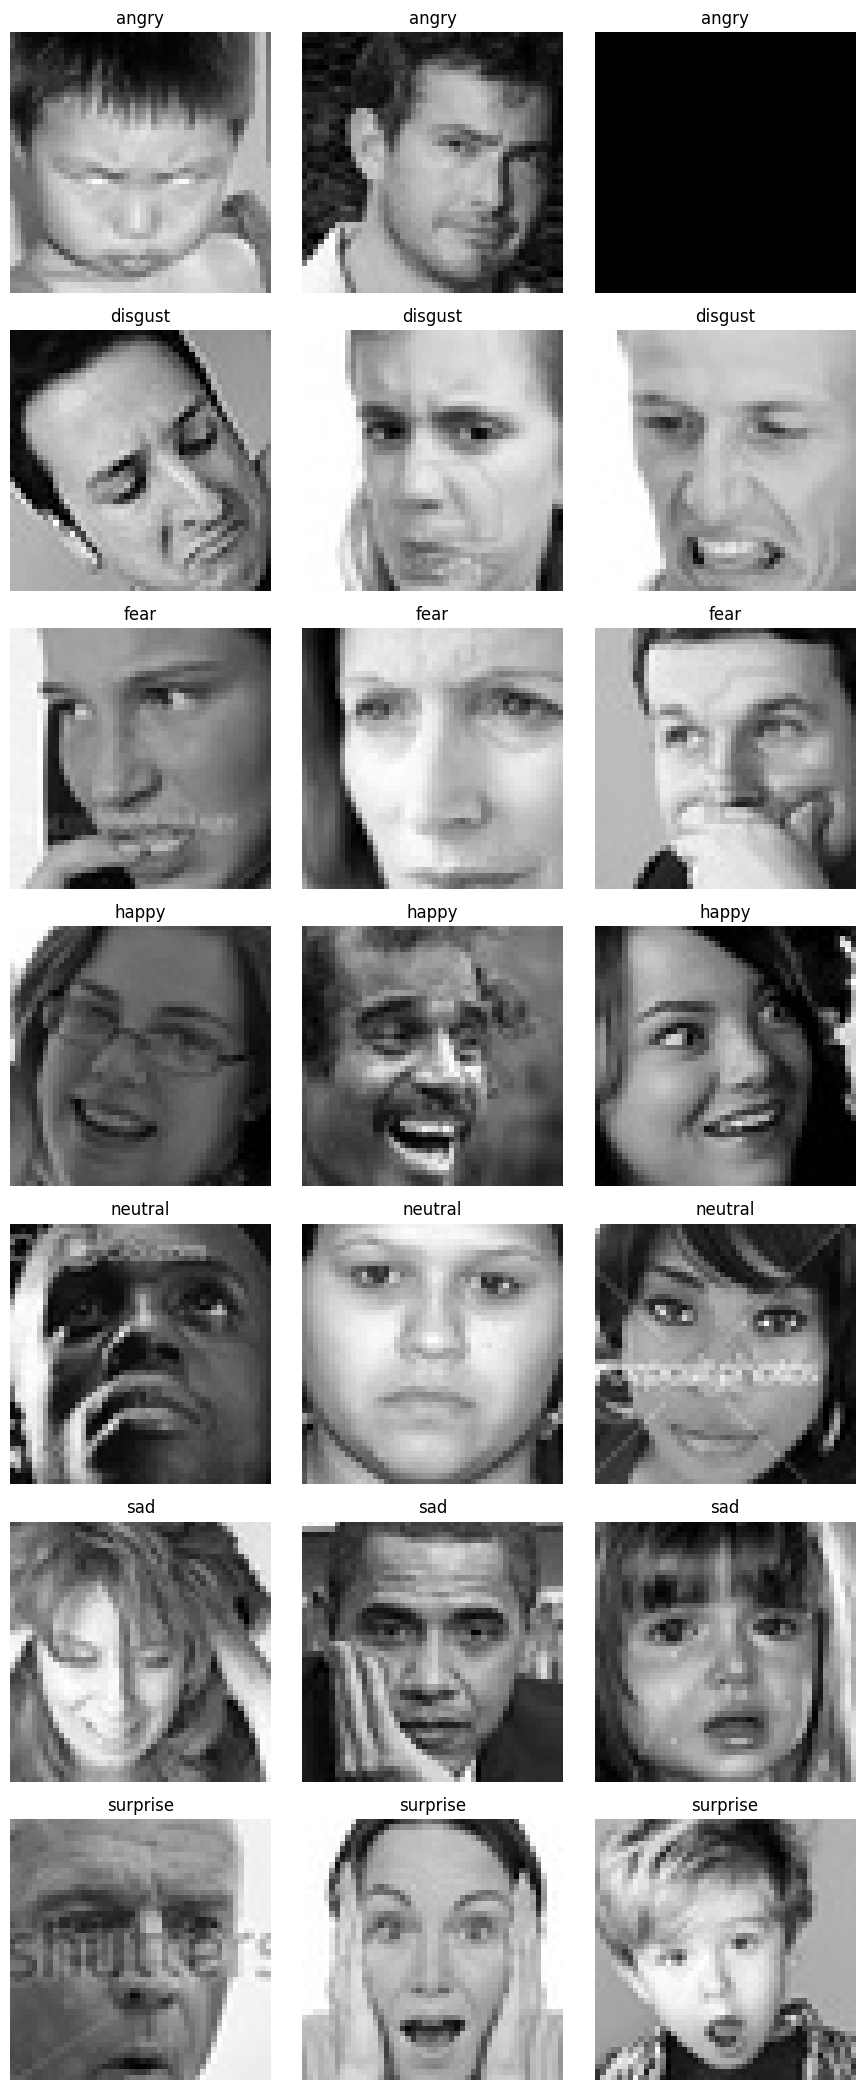

In [10]:
def show_class_samples(dataset, classes, n=3):
    fig, axs = plt.subplots(len(classes), n, figsize=(n*3, len(classes)*3))

    for cls_idx, cls in enumerate(classes):
        cls_path = os.path.join(train_dir, cls)
        image_files = os.listdir(cls_path)[:n]

        for i in range(n):
            img_path = os.path.join(cls_path, image_files[i])
            img = plt.imread(img_path)
            axs[cls_idx][i].imshow(img, cmap='gray')
            axs[cls_idx][i].set_title(cls)
            axs[cls_idx][i].axis('off')

    plt.tight_layout()
    plt.show()

show_class_samples(train_dataset, classes, n=3)


In [11]:
sample_img, sample_label = train_dataset[0]
print("Image shape:", sample_img.shape)  # Expect (1, 48, 48)
print("Label:", classes[sample_label])


Image shape: torch.Size([1, 48, 48])
Label: angry


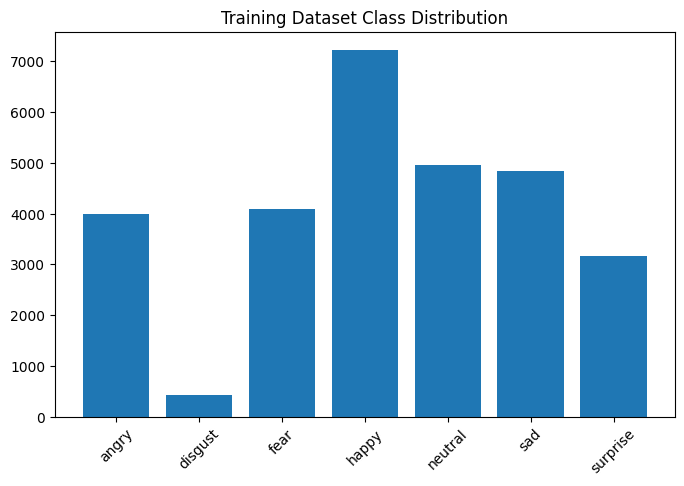

Counter({3: 7215, 4: 4965, 5: 4830, 2: 4097, 0: 3995, 6: 3171, 1: 436})

In [12]:
train_counts = Counter([label for _, label in train_dataset])
count_list = [train_counts[i] for i in range(len(classes))]

plt.figure(figsize=(8, 5))
plt.bar(classes, count_list)
plt.title("Training Dataset Class Distribution")
plt.xticks(rotation=45)
plt.show()

train_counts


### Observations

- Dataset loads correctly
- Images appear grayscale
- Classes detected: angry, disgust, fear, happy, neutral, sad, surprise
- disgust is disproportionally low and happy is almost twice more than all other type - will influence sampling & metrics
-  Augmentations needed during training to improve generalization

Plan:
- Add stronger augmentations for training (flip, rotation, etc.)
- Track F1-score alongside accuracy
